# PURPOSE OF THIS NOTEBOOK:
Analyze and determine how much of a gap there is between Max and his second teammate since 2022. This will test my hypothesis that the issues that Checo were facing were a car issue and not an issue of his skill. 

In [1]:
import pandas as pd
import numpy as np
import fastf1
import fastf1.plotting
import matplotlib as mpl
import datetime

from matplotlib import pyplot as plt
from matplotlib.collections import LineCollection

In [2]:
# Setting consistant variables
year = 2025
wknd = 1
ses = 'Q'
VER = 'VER'
LAW = 'LAW'
HAD = 'HAD'
colormap = mpl.cm.turbo

In [3]:
# Doing a test run to plot 
session = fastf1.get_session(year, wknd, ses)
session.load()
weekend = session.event

MaxLap = session.laps.pick_drivers(VER).pick_fastest()
LawLap = session.laps.pick_drivers(LAW).pick_fastest()
HadLap = session.laps.pick_drivers(HAD).pick_fastest()

# Get the telemetry for max
VER_x = MaxLap.telemetry['X']
VER_y = MaxLap.telemetry['Y']
VER_color = MaxLap.telemetry['Speed']
VER_laptime = MaxLap.telemetry[-1:]
VER_td = timedelta.Timedelta(MaxLap['LapTime'])

# Get telemetry for liam
LAW_x = LawLap.telemetry['X']
LAW_y = LawLap.telemetry['Y']
LAW_color = LawLap.telemetry['Speed']
LAW_laptime = LawLap.telemetry[-1:]
LAW_td = timedelta.Timedelta(LawLap['LapTime'])

req         WARNING 	DEFAULT CACHE ENABLED! (513.68 MB) /home/omah/.cache/fastf1
core           INFO 	Loading data for Australian Grand Prix - Qualifying [v3.5.3]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['4', '81', '1', '63', '22', '23', '16', '44', '10', '55', '6', '14', '18', '7', '5', '12', '27', '30', '31', '87']


NameError: name 'timedelta' is not defined

In [ ]:
VER_points = np.array([VER_x, VER_y]).T.reshape(-1, 1, 2)
VER_segments = np.concatenate([VER_points[:-1], VER_points[1:]], axis=1)

LAW_points = np.array([LAW_x, LAW_y]).T.reshape(-1, 1, 2)
LAW_segments = np.concatenate([LAW_points[:-1], LAW_points[1:]], axis=1)

In [ ]:
# Turn it into a function:
def plot_fastest_lap(segments, lap, color, weekend, driver, laptime):
    fig, ax = plt.subplots(sharex=True, sharey=True, figsize=(12, 6.75))
    plt.title(f'{driver} time: {laptime.total.minutes}:{laptime.total.seconds}',
                size=24, loc='right')
    plt.title(f'{weekend.name} {year} - {driver} - Throttle', size=24, loc='left')


    # Adjust margins and turn of axis
    plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.12)
    ax.axis('off')


    # After this, we plot the data itself.
    # Create background track line
    ax.plot(lap.telemetry['X'], lap.telemetry['Y'],
            color='black', linestyle='-', linewidth=16, zorder=0)

    # Create a continuous norm to map from data points to colors
    norm = plt.Normalize(color.min(), color.max())
    lc = LineCollection(segments, cmap=colormap, norm=norm,
                        linestyle='-', linewidth=5)

    # Set the values used for colormapping
    lc.set_array(color)

    # Merge all line segments together
    line = ax.add_collection(lc)


    # Finally, we create a color bar as a legend.
    cbaxes = fig.add_axes([0.25, 0.05, 0.5, 0.05])
    normlegend = mpl.colors.Normalize(vmin=color.min(), vmax=color.max())
    legend = mpl.colorbar.ColorbarBase(cbaxes, norm=normlegend, cmap=colormap,
                                    orientation="horizontal")


    # Show the plot
    plt.show()
    print(f"{driver} time: {laptime.total.minutes}:{laptime.total.seconds}")

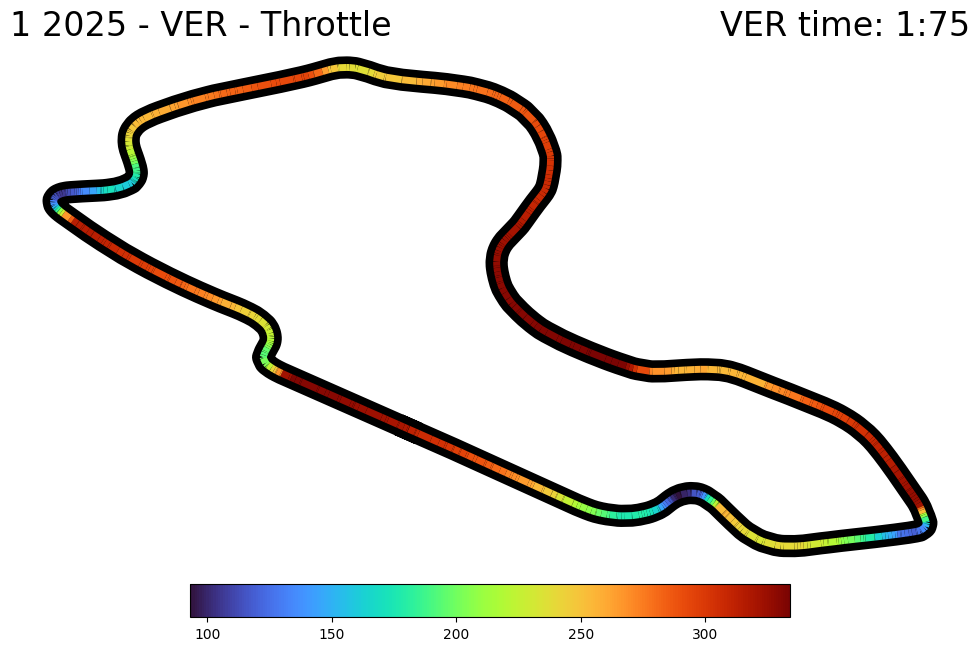

VER time: 1:75


In [ ]:
# Plot Max's lap
plot_fastest_lap(VER_segments, MaxLap, VER_color, weekend, VER, VER_td)

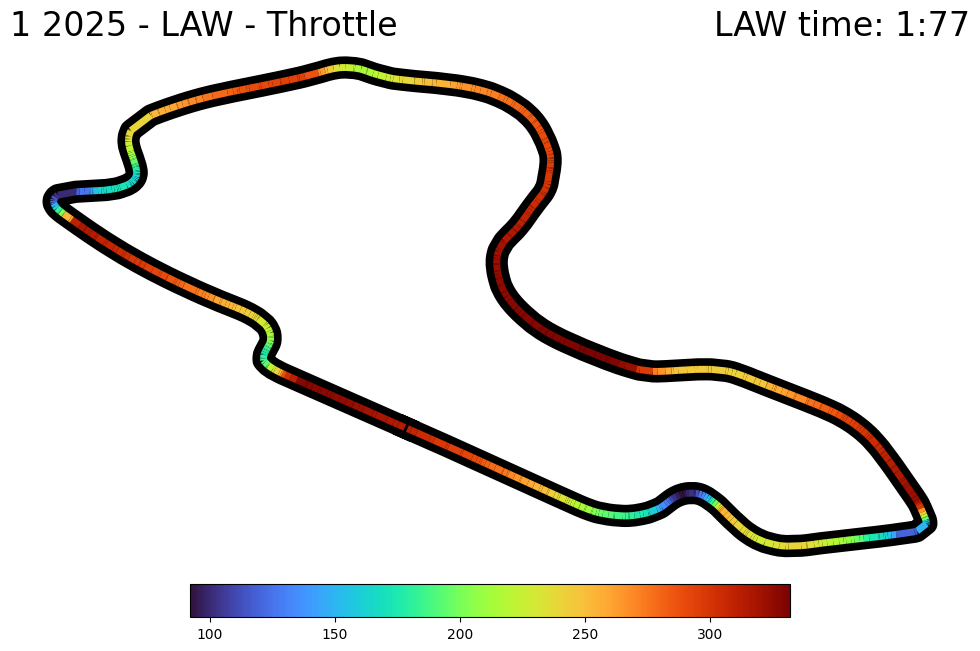

LAW time: 1:77


In [ ]:
# now for lawson
plot_fastest_lap(LAW_segments, LawLap, LAW_color, weekend, LAW, LAW_td)


req            INFO 	Using cached data for driver_info


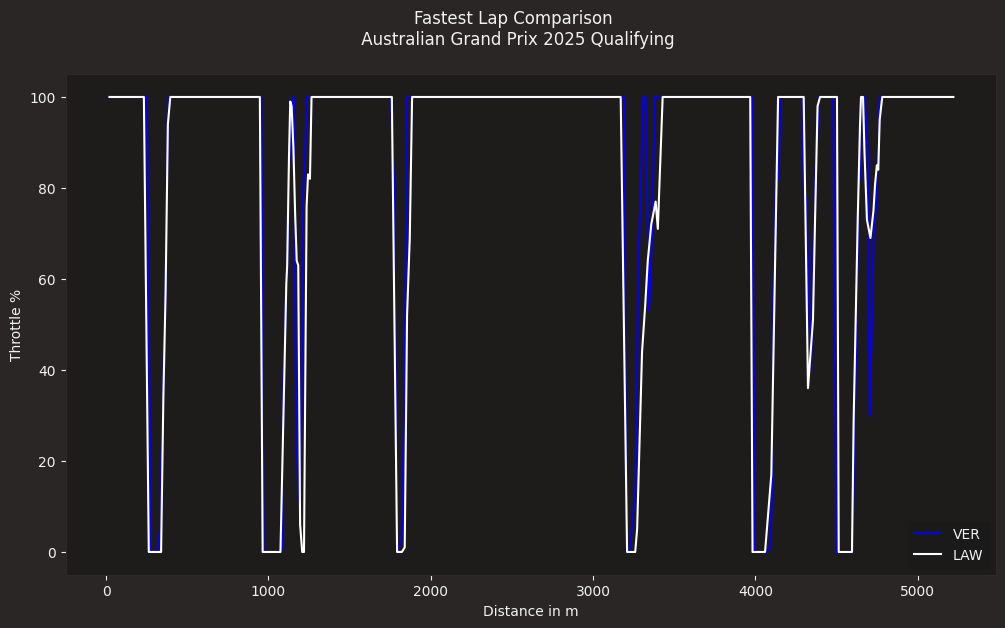

In [ ]:
fastf1.plotting.setup_mpl(mpl_timedelta_support=True, misc_mpl_mods=False,
                          color_scheme='fastf1')

VER_tel = MaxLap.get_car_data().add_distance()
LAW_tel = LawLap.get_car_data().add_distance()

rbr_color = fastf1.plotting.get_team_color(MaxLap['Team'], session=session)
vcarb_color = fastf1.plotting.get_team_color(HadLap['Team'], session=session)

fig, ax = plt.subplots(figsize=(12,6.5))
ax.plot(VER_tel['Distance'], VER_tel['Throttle'], color=rbr_color, label=VER)
ax.plot(LAW_tel['Distance'], LAW_tel['Throttle'], color='white', label=LAW)

ax.set_xlabel('Distance in m')
ax.set_ylabel('Throttle %')

ax.legend()
plt.suptitle(f"Fastest Lap Comparison \n "
             f"{session.event['EventName']} {session.event.year} Qualifying")

plt.show()

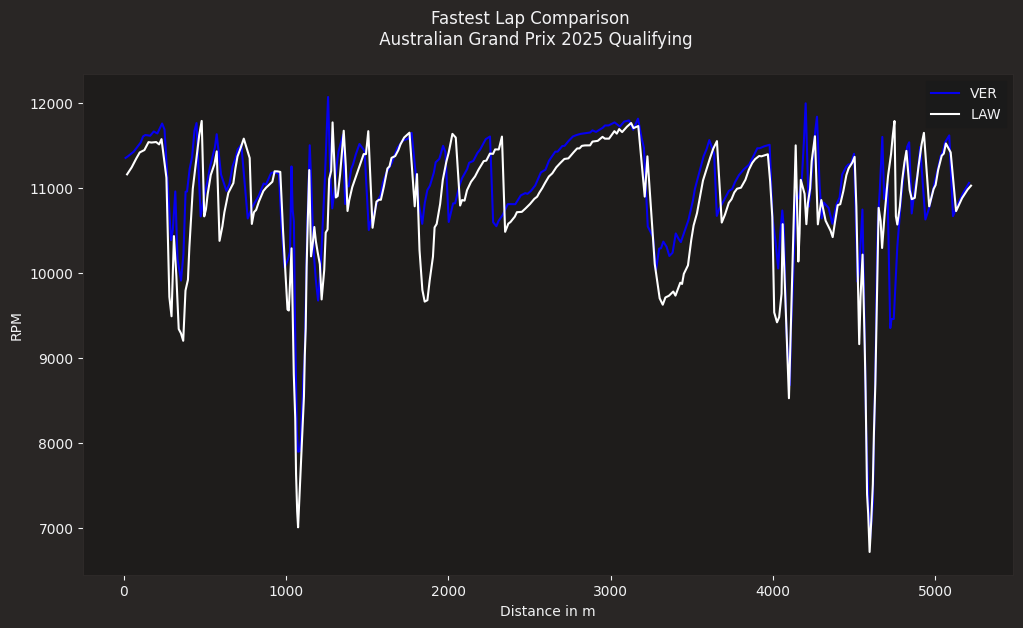

In [ ]:
fastf1.plotting.setup_mpl(mpl_timedelta_support=True, misc_mpl_mods=False,
                          color_scheme='fastf1')

VER_tel = MaxLap.get_car_data().add_distance()
LAW_tel = LawLap.get_car_data().add_distance()

rbr_color = fastf1.plotting.get_team_color(MaxLap['Team'], session=session)
vcarb_color = fastf1.plotting.get_team_color(HadLap['Team'], session=session)

fig, ax = plt.subplots(figsize=(12,6.5))
ax.plot(VER_tel['Distance'], VER_tel['RPM'], color=rbr_color, label=VER)
ax.plot(LAW_tel['Distance'], LAW_tel['RPM'], color='white', label=LAW)

ax.set_xlabel('Distance in m')
ax.set_ylabel('RPM')

ax.legend()
plt.suptitle(f"Fastest Lap Comparison \n "
             f"{session.event['EventName']} {session.event.year} Qualifying")

plt.show()


## MY HYPOTHESIS
The issues that Checo and Liam were facing driving the redbull were a car issue and not a driver issue. 

### HOW WOULD I PROVE THAT
I would need to control for driver skill as much as possible. We're looking for evidence of variation between the two drivers. One way to set a baseline is to compare variations between two drivers on multiple teams to get a baseline.

core           INFO 	Loading data for Monaco Grand Prix - Race [v3.5.3]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '14', '31', '44', '63', '16', '10', '55', '4', '81', '77', '21', '24', '23', '22', '11', '27', '2', '20', '18']


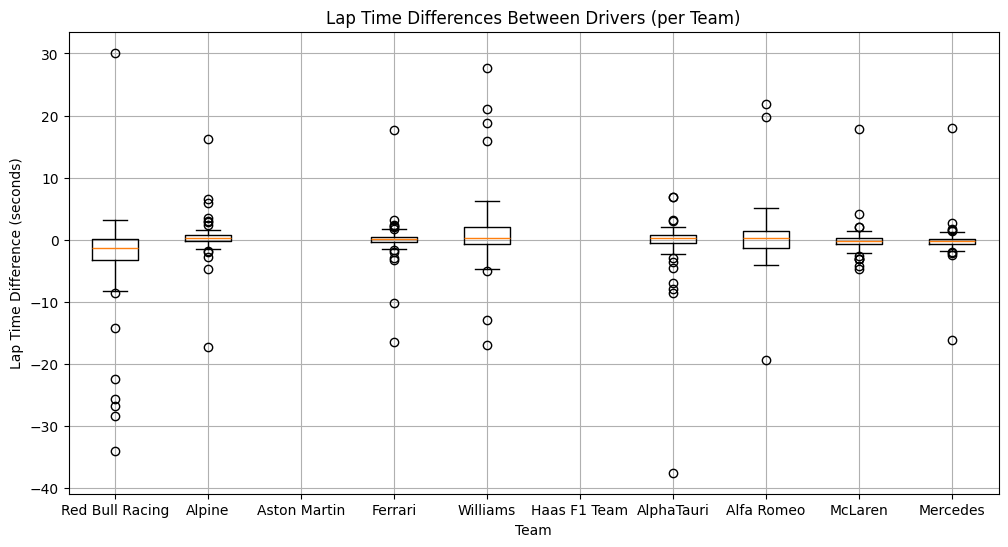

In [ ]:
# TODO: 
# import 1 race, change to loop to compare multiple races overtime
race = fastf1.get_session(2023, 'Monaco', 'R')
race.load()

# Make a list of all the teams 
Teams = race.laps['Team'].unique().tolist()
# Box plot between two drivers in Monaco
# TODO: Change to loop to showcase all races. 
team_differences = {}

# Convert time delta to seconds 
race.laps['LapTime'] = race.laps['LapTime'].map(lambda x: datetime.timedelta.total_seconds(x) if (np.all(pd.notnull(x))) else np.nan)
for team in Teams:
    drivers = race.laps[race.laps['Team'] == team].Driver.unique()
    # Pull drivers and laps
    driver1 = drivers[0]
    driver2= drivers[1]
    driver1_laps = race.laps[race.laps['Driver'] == driver1].copy()
    driver2_laps = race.laps[race.laps['Driver'] == driver2].copy()

    # filter to only laps where both drivers completed 
    common_laps = np.intersect1d(driver1_laps['LapNumber'], driver2_laps['LapNumber'])

    driver1_common_laps = driver1_laps[driver1_laps['LapNumber'].isin(common_laps)]
    driver2_common_laps = driver2_laps[driver2_laps['LapNumber'].isin(common_laps)]

    # Calculate  the lap time differences
    lap_time_diffs = driver1_common_laps['LapTime'].values - driver2_common_laps['LapTime'].values

    team_differences[team] = lap_time_diffs

    
# Prepare data for the box plot
box_plot_data = []
team_names = []
for team, diffs in team_differences.items():
    box_plot_data.append(diffs)
    team_names.append(team)

# Create the box plot
plt.figure(figsize=(12, 6))
plt.boxplot(box_plot_data, tick_labels=team_names)
plt.title("Lap Time Differences Between Drivers (per Team)")
plt.xlabel("Team")
plt.ylabel("Lap Time Difference (seconds)")
plt.grid(True)
plt.show()


In [98]:
# now create histogram of laptime differences. 


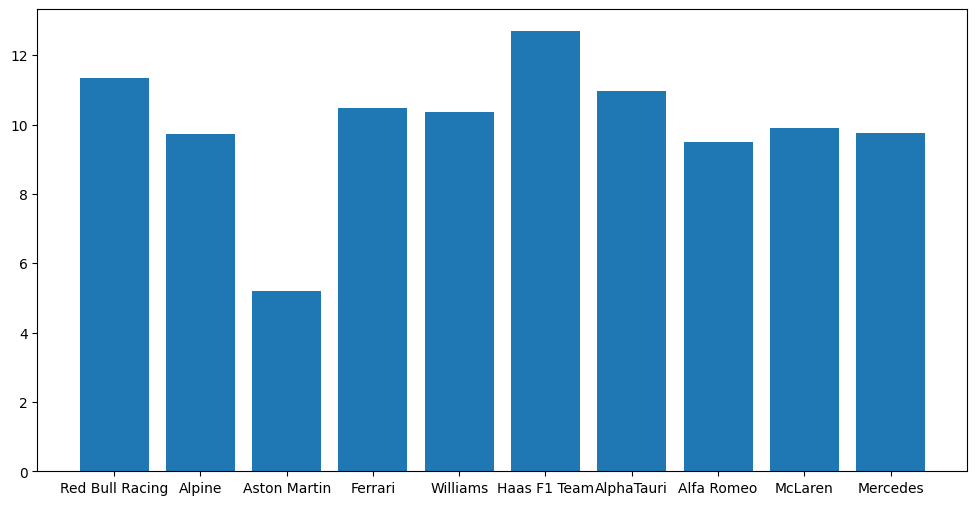

In [99]:
# Standard deviation of lap time differences 
team_std = {}
for team in Teams:
    drivers = race.laps[race.laps['Team'] == team].Driver.unique()
    # Pull drivers and laps
    driver1 = drivers[0]
    driver2= drivers[1]
    driver1_laps = race.laps[race.laps['Driver'] == driver1].copy()
    driver2_laps = race.laps[race.laps['Driver'] == driver2].copy()

    # filter to only laps where both drivers completed 
    common_laps = np.intersect1d(driver1_laps['LapNumber'], driver2_laps['LapNumber'])   
    driver1_common_laps = driver1_laps[driver1_laps['LapNumber'].isin(common_laps)]
    driver2_common_laps = driver2_laps[driver2_laps['LapNumber'].isin(common_laps)]

    # reset index
    driver1_common_laps.reset_index(inplace=True)
    driver2_common_laps.reset_index(inplace=True)

    df = pd.DataFrame(columns=['driver1_times', 'driver2_times'])
    df['driver1_times'] = driver1_common_laps['LapTime']
    df['driver2_times'] = driver2_common_laps['LapTime']

    std_series = pd.concat([df.driver1_times, df.driver2_times])
    
    team_std[team] = std_series.std()

bar_graph_data = []
team_names = []
for team, diffs in team_std.items():
    bar_graph_data.append(diffs)
    team_names.append(team)

plt.figure(figsize=(12, 6))
plt.bar(team_names, bar_graph_data)
plt.show()
